In [1]:
import pandas as pd
import warnings

# Suppress specific warning categories, in this case, FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
# Load the datasets
gdp_data = pd.read_csv('target.csv')
food_index_data = pd.read_csv('foodindex.csv')


In [2]:
from ydata_profiling import ProfileReport

# Step 1: Parse the 'Date' columns as datetime
gdp_data['Date'] = pd.to_datetime(gdp_data['Date'], format='%b-%y')
food_index_data['Date'] = pd.to_datetime(food_index_data['Date'])



# EDA

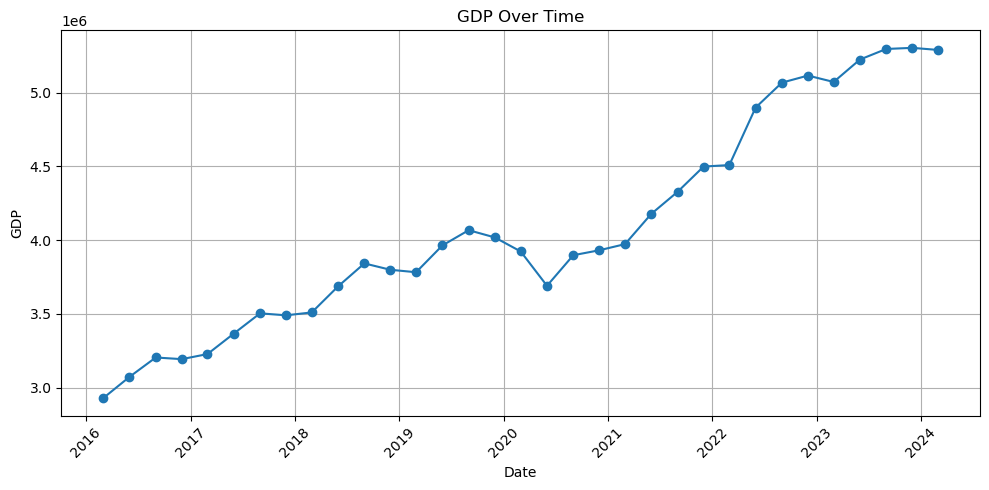

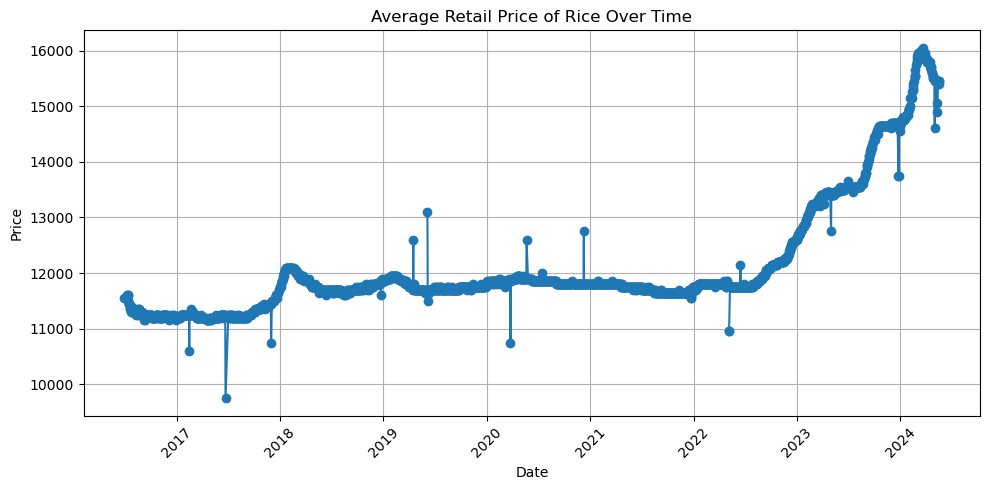

In [3]:
import matplotlib.pyplot as plt

# Plotting GDP data
plt.figure(figsize=(10, 5))
plt.plot(gdp_data['Date'], gdp_data['Gross Domestic Product: SNA 2008'], marker='o', linestyle='-')
plt.title('GDP Over Time')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Assuming you choose a couple of columns from the food index to plot
plt.figure(figsize=(10, 5))
plt.plot(food_index_data['Date'], food_index_data['Average Retail Price: Rice: Traditional Market'], marker='o', linestyle='-')
plt.title('Average Retail Price of Rice Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Feature Engineering

### Merge Data & Linear Interpolation Oversample

In [4]:

import matplotlib.pyplot as plt

# Creating a complete date range from the min to max date found in the data
date_range = pd.date_range(start=food_index_data['Date'].min(), end=food_index_data['Date'].max(), freq='D')

# Creating a new DataFrame with this complete date range
complete_dates_df = pd.DataFrame(date_range, columns=['Date'])

# Merging the complete dates DataFrame with the original food_index_data
# This merge will ensure all dates are included and missing dates will have NaN values in the other columns
full_food_index_data = complete_dates_df.merge(food_index_data, on='Date', how='left')

# Do the same with GDP data

final_data = full_food_index_data.merge(gdp_data, on='Date', how='left')

# Rename column names for clarity

column_renames = {
    'Date': 'date',
    'Average Retail Price: Rice: Traditional Market': 'price_rice_traditional',
    'Average Retail Price: Rice: Low Quality I: Traditional Market': 'price_rice_low_q1_traditional',
    'Average Retail Price: Rice: Low Quality II: Traditional Market': 'price_rice_low_q2_traditional',
    'Average Retail Price: Rice: Medium Quality I: Traditional Market': 'price_rice_medium_q1_traditional',
    'Average Retail Price: Rice: Medium Quality II: Traditional Market': 'price_rice_medium_q2_traditional',
    'Average Retail Price: Rice: Super Quality I: Traditional Market': 'price_rice_super_q1_traditional',
    'Average Retail Price: Rice: Super Quality II: Traditional Market': 'price_rice_super_q2_traditional',
    'Average Retail Price: Chicken Meat: Traditional Market': 'price_chicken_traditional',
    'Average Retail Price: Chicken Meat: Purebred Chicken: Traditional Market': 'price_chicken_purebred_traditional',
    'Average Retail Price: Beef: Traditional Market': 'price_beef_traditional',
    'Average Retail Price: Beef: Quality 1: Traditional Market': 'price_beef_q1_traditional',
    'Average Retail Price: Beef: Quality 2: Traditional Market': 'price_beef_q2_traditional',
    'Average Retail Price: Egg: Traditional Market': 'price_egg_traditional',
    'Average Retail Price: Egg: Purebred Chicken Egg: Traditional Market': 'price_egg_purebred_traditional',
    'Average Retail Price: Onion: Traditional Market': 'price_onion_traditional',
    'Average Retail Price: Onion: Medium Size: Traditional Market': 'price_onion_medium_traditional',
    'Average Retail Price: Garlic: Traditional Market': 'price_garlic_traditional',
    'Average Retail Price: Garlic: Medium Size: Traditional Market': 'price_garlic_medium_traditional',
    'Average Retail Price: Red Chili Pepper: Traditional Market': 'price_red_chili_traditional',
    'Average Retail Price: Red Chili Pepper: Big: Traditional Market': 'price_red_chili_big_traditional',
    'Average Retail Price: Red Chili Pepper: Curly: Traditional Market': 'price_red_chili_curly_traditional',
    'Average Retail Price: Cayenne Pepper: Traditional Market': 'price_cayenne_traditional',
    'Average Retail Price: Cayenne Pepper: Green: Traditional Market': 'price_cayenne_green_traditional',
    'Average Retail Price: Cayenne Pepper: Red: Traditional Market': 'price_cayenne_red_traditional',
    'Average Retail Price: Cooking Oil: Traditional Market': 'price_cooking_oil_traditional',
    'Average Retail Price: Cooking Oil: Bulky: Traditional Market': 'price_cooking_oil_bulky_traditional',
    'Average Retail Price: Cooking Oil: Brand I: Traditional Market': 'price_cooking_oil_brand1_traditional',
    'Average Retail Price: Cooking Oil: Brand II: Traditional Market': 'price_cooking_oil_brand2_traditional',
    'Average Retail Price: Sugar: Traditional Market': 'price_sugar_traditional',
    'Average Retail Price: Sugar: Premium Quality: Traditional Market': 'price_sugar_premium_traditional',
    'Average Retail Price: Sugar: Local: Traditional Market': 'price_sugar_local_traditional',
    'Average Retail Price: Rice: Modern Market': 'price_rice_modern',
    'Average Retail Price: Rice: Low Quality I: Modern Market': 'price_rice_low_q1_modern',
    'Average Retail Price: Rice: Low Quality II: Modern Market': 'price_rice_low_q2_modern',
    'Average Retail Price: Rice: Medium Quality I: Modern Market': 'price_rice_medium_q1_modern',
    'Average Retail Price: Rice: Medium Quality II: Modern Market': 'price_rice_medium_q2_modern',
    'Average Retail Price: Rice: Super Quality I: Modern Market': 'price_rice_super_q1_modern',
    'Average Retail Price: Rice: Super Quality II: Modern Market': 'price_rice_super_q2_modern',
    'Average Retail Price: Chicken Meat: Modern Market': 'price_chicken_modern',
    'Average Retail Price: Chicken Meat: Purebred Chicken: Modern Market': 'price_chicken_purebred_modern',
    'Average Retail Price: Beef: Modern Market': 'price_beef_modern',
    'Average Retail Price: Beef: Quality 1: Modern Market': 'price_beef_q1_modern',
    'Average Retail Price: Beef: Quality 2: Modern Market': 'price_beef_q2_modern',
    'Average Retail Price: Egg: Modern Market': 'price_egg_modern',
    'Retail Price: Egg: Purebred Chicken Egg: Modern Market': 'price_egg_purebred_modern',
    'Retail Price: Onion: Modern Market': 'price_onion_modern',
    'Average Retail Price: Onion: Medium Size: Modern Market': 'price_onion_medium_modern',
    'Average Retail Price: Garlic: Modern Market': 'price_garlic_modern',
    'Average Retail Price: Garlic: Medium Size: Modern Market': 'price_garlic_medium_modern',
    'Average Retail Price: Red Chili Pepper: Modern Market': 'price_red_chili_modern',
    'Average Retail Price: Red Chili Pepper: Big: Modern Market': 'price_red_chili_big_modern',
    'Average Retail Price: Red Chili Pepper: Curly: Modern Market': 'price_red_chili_curly_modern',
    'Average Retail Price: Cayenne Pepper: Modern Market': 'price_cayenne_modern',
    'Average Retail Price: Cayenne Pepper: Green: Modern Market': 'price_cayenne_green_modern',
    'Average Retail Price: Cayenne Pepper: Red: Modern Market': 'price_cayenne_red_modern',
    'Average Retail Price: Cooking Oil: Modern Market': 'price_cooking_oil_modern',
    'Average Retail Price: Cooking Oil: Brand I: Modern Market': 'price_cooking_oil_brand1_modern',
    'Average Retail Price: Cooking Oil: Brand II: Modern Market': 'price_cooking_oil_brand2_modern',
    'Average Retail Price: Sugar: Modern Market': 'price_sugar_modern',
    'Average Retail Price: Sugar: Premium Quality: Modern Market': 'price_sugar_premium_modern',
    'Average Retail Price: Sugar: Local: Modern Market': 'price_sugar_local_modern',
    'Gross Domestic Product: SNA 2008': 'gdp_sna_2008'
}

final_data.rename(columns=column_renames, inplace=True)


### Compare Line Chart

C:\Users\mahen\AppData\Local\Temp\ipykernel_2044\3996953844.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_data_sample = final_data[final_data['date'].dt.year == 2023][final_data['date'].dt.month == 1]


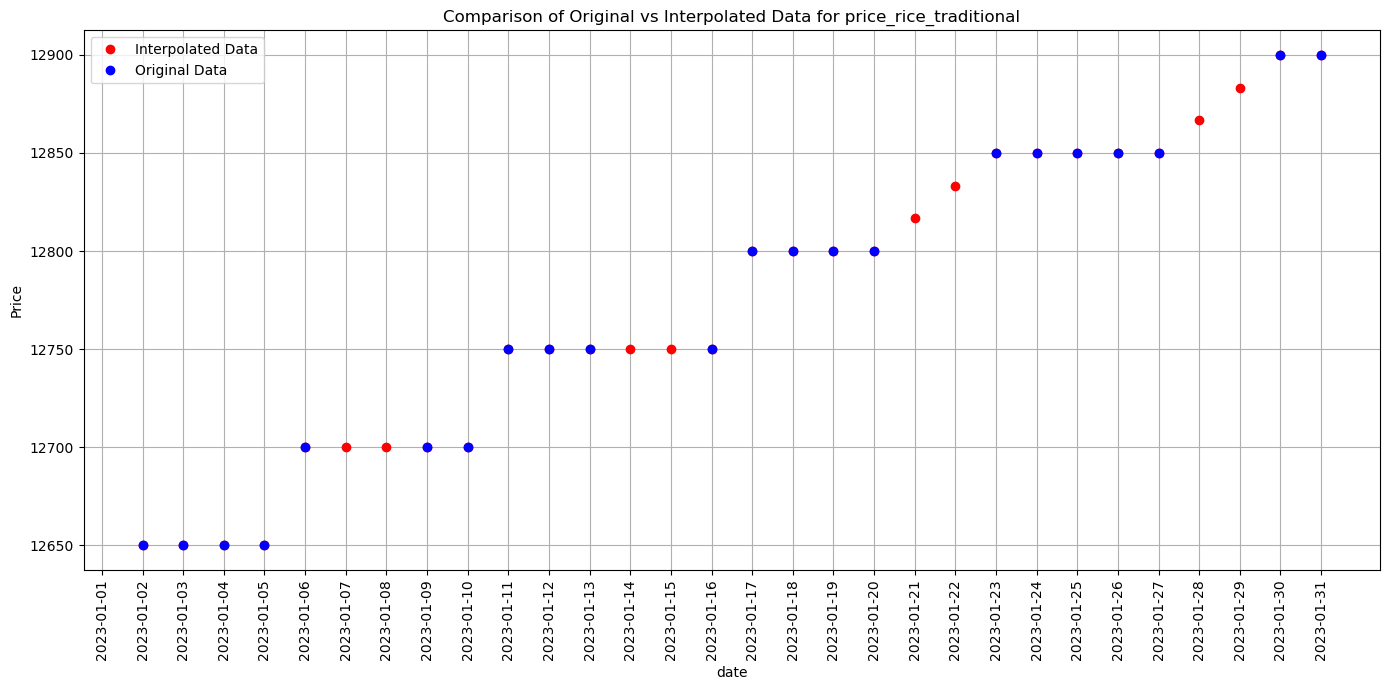

In [5]:
import matplotlib.pyplot as plt

# Select a column to demonstrate, for example 'Average Retail Price: Rice: Traditional Market'
target_column_name = 'gdp_sna_2008'
sample_feature_column_name = 'price_rice_traditional'
sample_feature_column_name_2 = 'price_chicken_purebred_modern'
sample_feature_column_name_3 = 'price_cooking_oil_modern'
final_data_sample = final_data[final_data['date'].dt.year == 2023][final_data['date'].dt.month == 1]

# Applying interpolation on the sample data
final_data_interpolated = final_data_sample.interpolate(method='linear', limit_direction='forward', axis=0)

# Create a plot
plt.figure(figsize=(14, 7))
plt.plot(final_data_interpolated['date'], final_data_interpolated[sample_feature_column_name], label='Interpolated Data', marker='o', linestyle='', color='red')
plt.plot(final_data_sample['date'], final_data_sample[sample_feature_column_name], label='Original Data', marker='o', linestyle='', color='blue')
plt.title(f'Comparison of Original vs Interpolated Data for {sample_feature_column_name}')
plt.xlabel('date')
plt.ylabel('Price')

# Set xticks to display all dates
plt.xticks(final_data_interpolated['date'], final_data_interpolated['date'].dt.strftime('%Y-%m-%d'), rotation=90)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


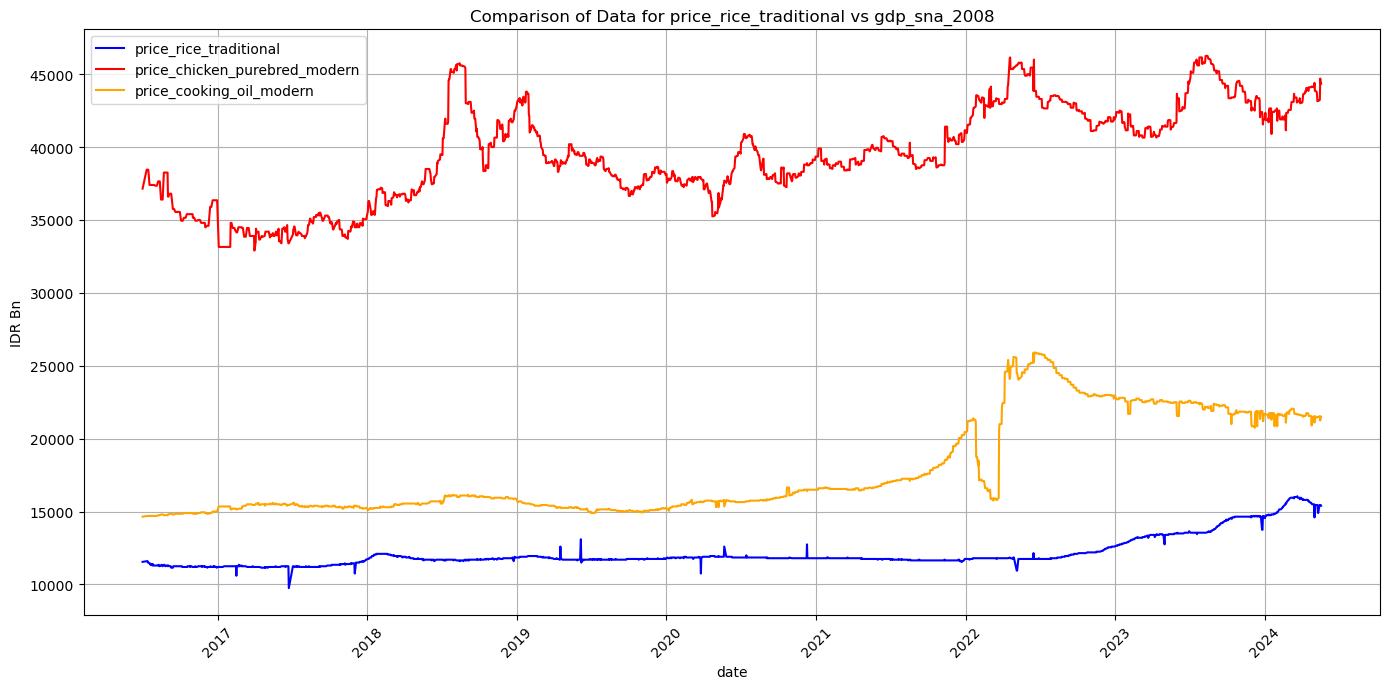

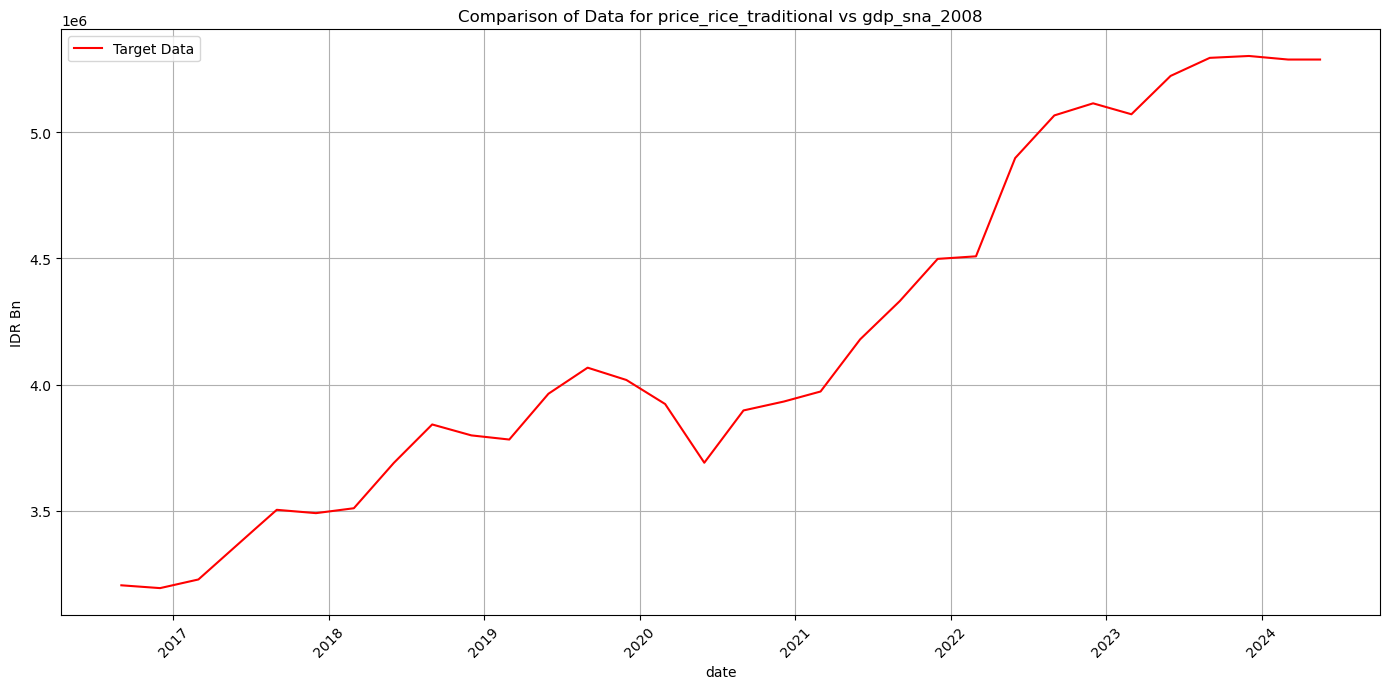

In [6]:
# Interpolate all Data
final_data.interpolate(method='linear', inplace=True)

# Create a plot
plt.figure(figsize=(14, 7))
plt.plot(final_data['date'], final_data[sample_feature_column_name], label=sample_feature_column_name, marker='', linestyle='-', color='blue')
plt.plot(final_data['date'], final_data[sample_feature_column_name_2], label=sample_feature_column_name_2, marker='', linestyle='-', color='red')
plt.plot(final_data['date'], final_data[sample_feature_column_name_3], label=sample_feature_column_name_3, marker='', linestyle='-', color='orange')
plt.title(f'Comparison of Data for {sample_feature_column_name} vs {target_column_name}')
plt.xlabel('date')
plt.ylabel('IDR Bn')

# Set xticks to display all dates
plt.xticks(rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a plot
plt.figure(figsize=(14, 7))
plt.plot(final_data['date'], final_data[target_column_name], label='Target Data', marker='', linestyle='-', color='red')
plt.title(f'Comparison of Data for {sample_feature_column_name} vs {target_column_name}')
plt.xlabel('date')
plt.ylabel('IDR Bn')

# Set xticks to display all dates
plt.xticks(rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Modelling

## Prophet

In [7]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

def forecast_and_plot(final_data, feature_list, output_png):
    """
    Trains a Prophet model, forecasts GDP, and saves a plot comparing forecast to actuals.

    Parameters:
    - final_data (DataFrame): The input data including dates, GDP, and potential regressors.
    - feature_list (list): A list of column names to be used as regressors.
    - output_png (str): File path to save the output plot.
    """

    # Ensure data is in the correct format
    final_data.rename(columns={'date': 'ds', 'gdp_sna_2008': 'y'}, inplace=True)

    # Splitting the data
    train = final_data[final_data['ds'] < '2023-01-01']
    test = final_data[(final_data['ds'] >= '2023-01-01') & (final_data['ds'] < '2024-01-01')]

    # Initialize Prophet model
    model = Prophet()
    for feature in feature_list:
        model.add_regressor(feature)

    # Fit the model on the training data
    model.fit(train)

    # Create a future dataframe that includes future values of 'ds' and the regressors
    future = model.make_future_dataframe(periods=365, include_history=False)
    future = future.merge(test[['ds'] + feature_list], on='ds', how='left')

    # Predict future values
    forecast = model.predict(future)

    # Plotting and comparing the forecast to actual data
    plt.figure(figsize=(10, 6))
    plt.plot(test['ds'], test['y'], label='Actual')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
    plt.title(f'{feature_list} GDP Forecast vs Actual', fontsize=10)
    plt.xlabel('Date')
    plt.ylabel('GDP')
    plt.legend()
    plt.savefig(output_png)
    plt.close()

# Usage example:
features = [
    'price_rice_traditional',
    'price_rice_low_q1_traditional',
    'price_rice_low_q2_traditional',
    'price_rice_medium_q1_traditional',
    'price_rice_medium_q2_traditional',
    'price_rice_super_q1_traditional',
    'price_rice_super_q2_traditional',
    'price_chicken_traditional',
    'price_chicken_purebred_traditional',
    'price_beef_traditional',
    'price_beef_q1_traditional',
    'price_beef_q2_traditional',
    'price_egg_traditional',
    'price_egg_purebred_traditional',
    'price_onion_traditional',
    'price_onion_medium_traditional',
    'price_garlic_traditional',
    'price_garlic_medium_traditional',
    'price_red_chili_traditional',
    'price_red_chili_big_traditional',
    'price_red_chili_curly_traditional',
    'price_cayenne_traditional',
    'price_cayenne_green_traditional',
    'price_cayenne_red_traditional',
    'price_cooking_oil_traditional',
    'price_cooking_oil_bulky_traditional',
    'price_cooking_oil_brand1_traditional',
    'price_cooking_oil_brand2_traditional',
    'price_sugar_traditional',
    'price_sugar_premium_traditional',
    'price_sugar_local_traditional',
    'price_rice_modern',
    'price_rice_low_q1_modern',
    'price_rice_low_q2_modern',
    'price_rice_medium_q1_modern',
    'price_rice_medium_q2_modern',
    'price_rice_super_q1_modern',
    'price_rice_super_q2_modern',
    'price_chicken_modern',
    'price_chicken_purebred_modern',
    'price_beef_modern',
    'price_beef_q1_modern',
    'price_beef_q2_modern',
    'price_egg_modern',
    'price_egg_purebred_modern',
    'price_onion_modern',
    'price_onion_medium_modern',
    'price_garlic_modern',
    'price_garlic_medium_modern',
    'price_red_chili_modern',
    'price_red_chili_big_modern',
    'price_red_chili_curly_modern',
    'price_cayenne_modern',
    'price_cayenne_green_modern',
    'price_cayenne_red_modern',
    'price_cooking_oil_modern',
    'price_cooking_oil_brand1_modern',
    'price_cooking_oil_brand2_modern',
    'price_sugar_modern',
    'price_sugar_premium_modern',
    'price_sugar_local_modern',
]

for i in range(0, len(features), 20):
    forecast_and_plot(final_data, features[0:i], f'experiment/{i}_gdp_forecast.png')


22:45:27 - cmdstanpy - INFO - Chain [1] start processing
22:45:28 - cmdstanpy - INFO - Chain [1] done processing
22:45:29 - cmdstanpy - INFO - Chain [1] start processing
22:45:31 - cmdstanpy - INFO - Chain [1] done processing
22:45:32 - cmdstanpy - INFO - Chain [1] start processing
22:45:35 - cmdstanpy - INFO - Chain [1] done processing
22:45:35 - cmdstanpy - INFO - Chain [1] start processing
22:45:39 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def plot_historical(actual_total, forecast_total, rmse_values, average_rmse, output_dir, filename):
    plt.figure(figsize=(10, 6))
    plt.plot(actual_total['ds'], actual_total['y'], label='Actual')
    plt.plot(forecast_total['ds'], forecast_total['yhat'], label='Forecast', marker='o')

    # Draw lines between actual and predicted points and annotate RMSE
    for i, date in enumerate(forecast_total['ds']):
        # Ensure there's an actual data point to match the forecast date
        if date in actual_total['ds'].values:
            actual_y = actual_total[actual_total['ds'] == date]['y'].values[0]
            forecast_y = forecast_total[forecast_total['ds'] == date]['yhat'].values[0]
            plt.plot([date, date], [actual_y, forecast_y], 'k--')  # 'k--' denotes a black dashed line

            # Calculate mid-point for RMSE annotation
            mid_y = (actual_y + forecast_y) / 2
            plt.annotate(f'RMSE: {rmse_values[i]:.2f}', (date, mid_y), textcoords="offset points", xytext=(0,10), ha='center')

    # Annotate average RMSE
    plt.annotate(f'Average RMSE: {average_rmse:.2f}', (0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black", lw=1))

    plt.title('GDP Forecast vs Actual with RMSE Values', fontsize=10)
    plt.xlabel('Date')
    plt.ylabel('GDP')
    plt.legend()
    plt.savefig(f'{output_dir}/{filename}')
    plt.close()

def forecast_and_plot_quarterly(final_data,feature_list,prediction_dates,output_dir):
    """
    Trains and predicts GDP at specified dates using available historical data up to the last prediction,
    and saves the plots for each prediction.

    Parameters:
    - final_data (DataFrame): The input data including dates,GDP,and potential regressors.
    - feature_list (list): A list of column names to be used as regressors.
    - prediction_dates (list): A list of dates (str) when predictions are required.
    - output_dir (str): Directory to save the output plots.
    """

    actual_total = pd.DataFrame()
    forecast_total = pd.DataFrame()

    rmse_values = []

    for date in prediction_dates:
        prediction_date = pd.to_datetime(date)
        train_end = prediction_date - pd.DateOffset(months=3)
        regressors_end = prediction_date - pd.DateOffset(days=1)

        # Prepare data for this cycle
        train = final_data[(final_data['ds'] <= train_end)]
        future_regressors = final_data[(final_data['ds'] > train_end) & (final_data['ds'] <= regressors_end)][['ds'] + feature_list]

        # Initialize and fit the model
        model = Prophet()
        for feature in feature_list:
            model.add_regressor(feature)
        model.fit(train)

        # Create future dataframe and predict
        future = model.make_future_dataframe(periods=(regressors_end - train_end).days,include_history=True)

        # Merge future regressors and training data
        future = future.merge(future_regressors,on='ds',how='left')
        future = future.merge(train,on='ds',how='outer')

        # Combine columns from both merges where '_x' and '_y' columns may exist
        for feature in feature_list:
            future[feature] = future[f'{feature}_x'].combine_first(future[f'{feature}_y'])
            future.drop([f'{feature}_x',f'{feature}_y'],axis=1,inplace=True)

        forecast = model.predict(future)

        # Plotting and comparing the forecast to actual data
        actual = final_data[(final_data['ds'] >= train_end) & (final_data['ds'] <= regressors_end)]
        forecast = forecast[forecast['ds'] == regressors_end]

        actual_total = pd.concat([actual_total,actual])
        forecast_total = pd.concat([forecast_total,forecast])

        print(len(forecast_total))

        # Calculate RMSE for this prediction date
        print(forecast[forecast['ds'] == regressors_end]['yhat'])
        print(actual[actual['ds'] == regressors_end]['y'])
        rmse = np.sqrt(mean_squared_error(actual[actual['ds'] == regressors_end]['y'],forecast[forecast['ds'] == regressors_end]['yhat']))
        rmse_values.append(rmse)

    # Calculate average RMSE
    average_rmse = np.mean(rmse_values)

    # Plotting Without Historical data
    plot_historical(actual_total,forecast_total,rmse_values,average_rmse,output_dir,"gdp_forecast_rmse.png")

    # Plotting number with historical data
    actual_total = pd.concat([actual_total,final_data])
    plot_historical(actual_total,forecast_total,rmse_values,average_rmse,output_dir,"hist_gdp_forecast_rmse.png")
    

# Example of how to call the function
prediction_dates = [
    '2022-03-01',
    '2022-06-01',
    '2022-09-01',
    '2022-12-01',
    '2023-03-01',
    '2023-06-01',
    '2023-09-01',
    '2023-12-01',
    '2024-03-01',
    '2024-05-17'
    ]
forecast_and_plot_quarterly(final_data,features,prediction_dates,'experiment')


22:45:40 - cmdstanpy - INFO - Chain [1] start processing
22:45:42 - cmdstanpy - INFO - Chain [1] done processing


1
2068    4.494980e+06
Name: yhat, dtype: float64
2068    4508453.48
Name: y, dtype: float64


22:45:43 - cmdstanpy - INFO - Chain [1] start processing
22:45:46 - cmdstanpy - INFO - Chain [1] done processing


2
2160    4.745108e+06
Name: yhat, dtype: float64
2160    4.893657e+06
Name: y, dtype: float64


22:45:46 - cmdstanpy - INFO - Chain [1] start processing
22:45:49 - cmdstanpy - INFO - Chain [1] done processing


3
2252    4.956800e+06
Name: yhat, dtype: float64
2252    5.065027e+06
Name: y, dtype: float64


22:45:50 - cmdstanpy - INFO - Chain [1] start processing
22:45:53 - cmdstanpy - INFO - Chain [1] done processing


4
2343    5.112546e+06
Name: yhat, dtype: float64
2343    5.114245e+06
Name: y, dtype: float64


22:45:54 - cmdstanpy - INFO - Chain [1] start processing
22:45:57 - cmdstanpy - INFO - Chain [1] done processing


5
2433    5.176567e+06
Name: yhat, dtype: float64
2433    5.071964e+06
Name: y, dtype: float64


22:45:58 - cmdstanpy - INFO - Chain [1] start processing
22:46:01 - cmdstanpy - INFO - Chain [1] done processing


6
2525    5.287499e+06
Name: yhat, dtype: float64
2525    5.221717e+06
Name: y, dtype: float64


22:46:02 - cmdstanpy - INFO - Chain [1] start processing
22:46:06 - cmdstanpy - INFO - Chain [1] done processing


7
2617    5.444385e+06
Name: yhat, dtype: float64
2617    5.294203e+06
Name: y, dtype: float64


22:46:06 - cmdstanpy - INFO - Chain [1] start processing
22:46:10 - cmdstanpy - INFO - Chain [1] done processing


8
2708    5.311150e+06
Name: yhat, dtype: float64
2708    5.302461e+06
Name: y, dtype: float64


22:46:11 - cmdstanpy - INFO - Chain [1] start processing
22:46:14 - cmdstanpy - INFO - Chain [1] done processing


9
2799    5.259134e+06
Name: yhat, dtype: float64
2799    5.288449e+06
Name: y, dtype: float64


22:46:15 - cmdstanpy - INFO - Chain [1] start processing
22:46:19 - cmdstanpy - INFO - Chain [1] done processing


10
2876    5.343389e+06
Name: yhat, dtype: float64
2876    5288291.9
Name: y, dtype: float64
